## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
%pip install pandas seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from bs4 import BeautifulSoup

### **나.  학습데이터 불러오기**

In [2]:
dd = pd.read_csv("train.csv", sep=',', index_col = 0, encoding = 'utf-8' )

In [3]:
dd.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
url_len,,,,,,,,,,,,,,,,,,,,,
23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [4]:
dd = dd.dropna()

In [5]:
dd.isna().sum()

url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [6]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3662 entries, 23.0 to 18.0
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3662 non-null   float64
 1   url_path_len             3662 non-null   float64
 2   url_domain_len           3662 non-null   float64
 3   url_hostname_len         3662 non-null   float64
 4   url_num_dots             3662 non-null   float64
 5   url_num_underscores      3662 non-null   float64
 6   url_query_len            3662 non-null   float64
 7   url_num_query_para       3662 non-null   float64
 8   url_ip_present           3662 non-null   float64
 9   url_entropy              3662 non-null   float64
 10  url_chinese_present      3662 non-null   float64
 11  url_port                 3662 non-null   float64
 12  html_num_tags('iframe')  3662 non-null   float64
 13  html_num_tags('script')  3662 non-null   float64
 14  html_num_tags('embe

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3664 entries, 23.0 to 18.0
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3664 non-null   float64
 1   url_path_len             3663 non-null   float64
 2   url_domain_len           3663 non-null   float64
 3   url_hostname_len         3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_num_query_para       3664 non-null   float64
 8   url_ip_present           3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  url_chinese_present      3664 non-null   float64
 11  url_port                 3664 non-null   float64
 12  html_num_tags('iframe')  3664 non-null   float64
 13  html_num_tags('script')  3664 non-null   float64
 14  html_num_tags('embe

dd.head()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

숫자 : 
    url_len : URL 길이
    url_num_hypens_dom : URL내 '-'(하이픈) 개수
    url_path_len : URL의 경로 길이
    url_domain_len : URL의 도메인 길이
    url_host_name : URL의 hostname 길이
    url_num_dots : URL내 '.'(닷) 개수
    url_num_underscores : URL내 '_'(언더바) 개수
    url_query_len : URL쿼리 길이
    url_num_query_para : URL쿼리의 파라미터 개수
    url_entropy : URL 복잡도
    html_num_tags('iframe') : HTML내 'iframe' 태그 개수
    html_num_tags('script') : HTML내 'script' 태그 개수
    html_num_tags('embed') : HTML내 'embed' 태그 개수
    html_num_tags('object') : HTML내 'object' 태그 개수
    html_num_tags('div') : HTML내 'div' 태그 개수
    html_num_tags('head') : HTML내 'head' 태그 개수
    html_num_tags('body') : HTML내 'body' 태그 개수
    html_num_tags('form') : HTML내 'form' 태그 개수
    html_num_tags('a') : HTML내 'a' 태그 개수
# html_num_tags('applet') : HTML내 'applet' 태그 개수
label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

범주 : 
    url_ip_present : URL내 IP표시 여부  
### url_chinese_present : URL내 중국어 표기 여부 (주어진 데이터에서 모두 0이므로 제거할 필요 있음)#
    url_port : URL내 포트 표기 여부
    label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

In [7]:
dd.sum()

url_num_hyphens_dom                                                   1511.0
url_path_len                                                        107567.0
url_domain_len                                                       74650.0
url_hostname_len                                                     74440.0
url_num_dots                                                          9216.0
url_num_underscores                                                    999.0
url_query_len                                                        17249.0
url_num_query_para                                                     382.0
url_ip_present                                                         222.0
url_entropy                                                      15484.94335
url_chinese_present                                                      0.0
url_port                                                                 8.0
html_num_tags('iframe')                                                809.0

In [8]:
dd['url_entropy'].value_counts()

3.970176    18
4.084963    14
3.886842    13
3.973661    12
3.788755    11
            ..
4.309719     1
4.237424     1
3.825139     1
4.180649     1
3.619471     1
Name: url_entropy, Length: 2524, dtype: int64

In [9]:
dd['url_chinese_present'].value_counts()

0.0    3662
Name: url_chinese_present, dtype: int64

In [10]:
dd["html_num_tags('a')"].value_counts()

0.0       671
3.0       214
16.0      208
1.0       186
15.0      118
         ... 
2557.0      1
97.0        1
510.0       1
427.0       1
136.0       1
Name: html_num_tags('a'), Length: 300, dtype: int64

In [11]:
dd['url_num_query_para'].value_counts()

0.0    3469
1.0     105
2.0      41
3.0      33
6.0       5
7.0       4
9.0       2
8.0       2
4.0       1
Name: url_num_query_para, dtype: int64

In [12]:
dd['url_ip_present'].value_counts()

0.0    3440
1.0     222
Name: url_ip_present, dtype: int64

In [13]:
dd['url_port'].value_counts()

0.0    3654
1.0       8
Name: url_port, dtype: int64

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [14]:
# 데이터 프레임의 info를 확인합니다.
dd.duplicated().value_counts()

False    3231
True      431
dtype: int64

In [15]:
# 중복 데이터 제거를 제거합니다.
dd = dd.drop_duplicates()

In [16]:
# 데이터 프레임의 info를 확인합니다.
dd.duplicated().value_counts()

False    3231
dtype: int64

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
replace는 해당 값을 다른 값으로 대체한다.
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)
unique는 독특한 값 즉 리스트 안에서 중복되는 값을 뺀다.

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [17]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [18]:
df_ex.replace('NY', 'NewYork')
df_ex.replace('CA', 'California')

,name,age,state,point
0,Alice,24,NY,64
1,Bob,42,California,24
2,Charlie,18,California,70
3,Dave,68,TX,70
4,Ellen,24,California,88
5,Frank,30,NY,57


### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [19]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.
dd['label_binary'] = dd['label']

In [20]:
dd

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
url_len,,,,,,,,,,,,,,,,,,,,,
23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,malicious
75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,benign
20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,benign
27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,benign
39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,...,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,benign,benign
14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign,benign
68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious,malicious


### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [28]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.

dd['label_binary'] = dd['label_binary'].replace('benign', '0')

In [26]:
dd['label_binary'] = dd['label_binary'].replace('malicious', '1')

In [29]:
dd

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
url_len,,,,,,,,,,,,,,,,,,,,,
23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,...,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,benign,0
14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign,0
68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious,1


In [9]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인




---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [30]:
# 결축치의 존재를 확인합니다.

dd.isna().sum()

url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [2]:
# 결측치를 적절히 처리해줍니다.




In [38]:
# 결축치의 존재를 확인합니다.

dd.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3231 entries, 23.0 to 18.0
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3231 non-null   float64
 1   url_path_len             3231 non-null   float64
 2   url_domain_len           3231 non-null   float64
 3   url_hostname_len         3231 non-null   float64
 4   url_num_dots             3231 non-null   float64
 5   url_num_underscores      3231 non-null   float64
 6   url_query_len            3231 non-null   float64
 7   url_num_query_para       3231 non-null   float64
 8   url_ip_present           3231 non-null   float64
 9   url_entropy              3231 non-null   float64
 10  url_chinese_present      3231 non-null   float64
 11  url_port                 3231 non-null   float64
 12  html_num_tags('iframe')  3231 non-null   float64
 13  html_num_tags('script')  3231 non-null   float64
 14  html_num_tags('embe

In [40]:
dd['label_binary'] = dd['label_binary'].astype('float')

In [41]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3231 entries, 23.0 to 18.0
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3231 non-null   float64
 1   url_path_len             3231 non-null   float64
 2   url_domain_len           3231 non-null   float64
 3   url_hostname_len         3231 non-null   float64
 4   url_num_dots             3231 non-null   float64
 5   url_num_underscores      3231 non-null   float64
 6   url_query_len            3231 non-null   float64
 7   url_num_query_para       3231 non-null   float64
 8   url_ip_present           3231 non-null   float64
 9   url_entropy              3231 non-null   float64
 10  url_chinese_present      3231 non-null   float64
 11  url_port                 3231 non-null   float64
 12  html_num_tags('iframe')  3231 non-null   float64
 13  html_num_tags('script')  3231 non-null   float64
 14  html_num_tags('embe

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

<AxesSubplot:>

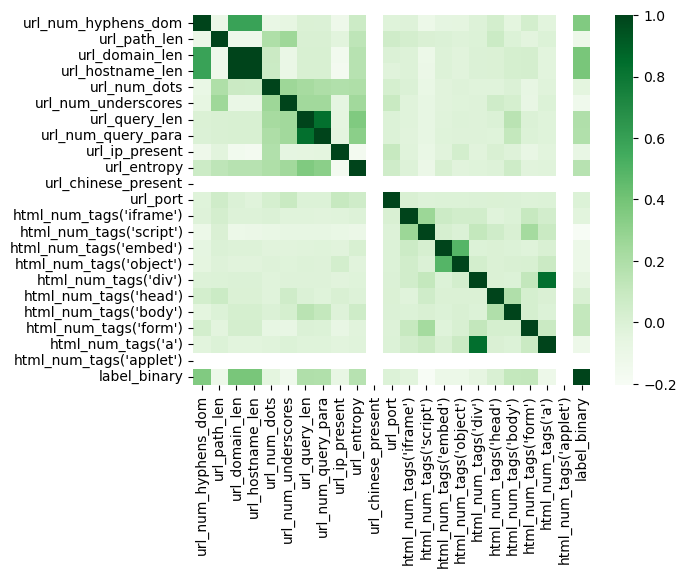

In [42]:
sns.heatmap(dd.corr(), annot = False, cmap = 'Greens')

In [60]:
dd_alpha = dd[['url_domain_len', 'url_hostname_len', 'url_num_hyphens_dom']]
dd_alpha

,url_domain_len,url_hostname_len,url_num_hyphens_dom
url_len,,,
23.0,15.0,15.0,0.0
75.0,17.0,17.0,0.0
20.0,16.0,16.0,0.0
27.0,14.0,14.0,0.0
39.0,27.0,27.0,2.0
...,...,...,...
42.0,21.0,21.0,0.0
14.0,14.0,14.0,0.0
68.0,52.0,52.0,3.0


In [63]:
dd_alpha.corr()

,url_domain_len,url_hostname_len,url_num_hyphens_dom
url_domain_len,1.000000,0.998956,0.589203
url_hostname_len,0.998956,1.000000,0.590278
url_num_hyphens_dom,0.589203,0.590278,1.000000


html_num_tags('div')와 html_num_tags('applet')은 강한 상관관계
html_num_tags('embed')와 html_num_tags('object')은 강한 상관관계
html_num_tags('applet')와 url_chinese_present는 결과값이 모두 0이므로 제거

-> url_domain_len만 살리기

In [76]:
dd.drop(['url_hostname_len', 'url_num_hyphens_dom'], axis=1)
dd.drop(['url_chinese_present', "html_num_tags('applet')"], axis=1)

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,label_binary
url_len,,,,,,,,,,,,,,,,,,,,,
23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,malicious,1.0
75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,benign,0.0
20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,benign,0.0
27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,benign,0.0
39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,benign,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,...,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,benign,0.0
14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,benign,0.0
68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,malicious,1.0


In [75]:
dd["html_num_tags('applet')"].value_counts()

0.0    3231
Name: html_num_tags('applet'), dtype: int64

In [77]:
dd

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
url_len,,,,,,,,,,,,,,,,,,,,,
23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1.0
75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0.0
20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0.0
27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0.0
39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,...,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,benign,0.0
14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign,0.0
68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious,1.0


---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [88]:
# target 확인
target = 'label'

# 데이터 분리
x = dd.drop(target, axis=1)
y = dd.loc[:, target]

In [89]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [90]:
x.shape

(3231, 23)

In [91]:
y.shape

(3231,)

In [96]:
x_train.to_csv("x_train.csv", index = True)

In [97]:
x_test.to_csv("x_test.csv", index = True)

In [99]:
y_train.to_csv("y_train.csv", index = True)

In [100]:
y_test.to_csv("y_test.csv", index = True)